In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
dataObj = load_digits()
X = dataObj.data
y = dataObj.target

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.30, random_state=1
)

In [2]:
dir(dataObj)
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
temp = pd.DataFrame(data=X, columns=dataObj.feature_names)
temp.head()
temp.shape

(1797, 64)

# Using pipeline
Use pipeline to simplify your machine learning. Try using the follow steps in the pipeline.
- Standardization
- PCA
- Support vector machine

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
pipe_svc = Pipeline([("scl", StandardScaler()), ("pca", PCA(n_components=10)), ("clf", SVC(random_state=1))])
pipe_svc.fit(X_train, y_train)
print(f'Train acc = {pipe_svc.score(X_train, y_train)}')
print(f'Test acc = {pipe_svc.score(X_test, y_test)}')

Train acc = 0.9689737470167065
Test acc = 0.9518518518518518


# Cross validation
Use 10 fold stratified cross-validation to calculate validation accuracy.

In [6]:
from sklearn.model_selection import cross_validate

In [7]:
scores = cross_validate(estimator=pipe_svc, X=X_train, y=y_train, cv=10, scoring=['accuracy'], n_jobs=-1)
print(np.mean(scores['test_accuracy']))

0.9403428571428571


# Learning curve
Find out how much samples (in fraction) do we need.

In [8]:
from sklearn.model_selection import learning_curve

In [9]:
train_size = np.linspace(0.1, 1.0, 10)
train_size, train_scores, val_scores = learning_curve(estimator=pipe_svc, 
                                                      X=X_train, y=y_train, 
                                                      train_sizes=train_size, cv=10, n_jobs=-1)

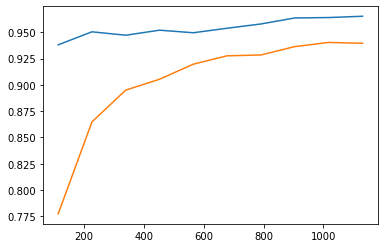

In [10]:
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.plot(train_size, train_mean)
plt.plot(train_size, val_mean)

# Validation curve
Find out what is a good value of `C`.

In [11]:
from sklearn.model_selection import validation_curve

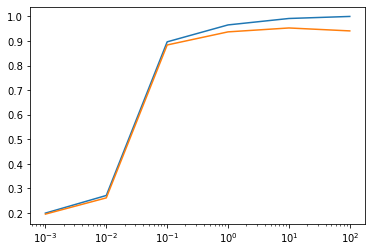

In [12]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

train_scores, val_scores = validation_curve(
                estimator=pipe_svc, 
                X=X_train, 
                y=y_train, 
                param_name='clf__C', 
                param_range=param_range,
                cv=10)
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
plt.plot(param_range, train_mean)
plt.plot(param_range, val_mean)
plt.xscale('log')

# Grid Search CV
Find out the best hyperparameters.

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

set1 = {'clf__C': param_range,
        'clf__kernel': ['linear']}

set2 = {'clf__C': param_range,
        'clf__gamma': param_range,
        'clf__kernel': ['rbf']}

param_grid = [set1, set2]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=5,
                  n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.score(X_test,y_test))

0.9498830076519319
0.9481481481481482


# Randomized Search CV
Find out the "best" hyperparameter you can in a limited time.

In [15]:
from sklearn.model_selection import RandomizedSearchCV


In [16]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

set1 = {'clf__C': param_range,
        'clf__kernel': ['linear']}

set2 = {'clf__C': param_range,
        'clf__gamma': param_range,
        'clf__kernel': ['rbf']}

param_grid = [set1, set2]

gs = RandomizedSearchCV(estimator=pipe_svc, 
                  param_distributions=param_grid, 
                  n_iter = 10,
                  scoring='accuracy', 
                  cv=5,
                  n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.score(X_test,y_test))

0.9482925441092771
0.95
